In [181]:
import numpy as np
import string
import matplotlib.pyplot as plt

In [132]:
string0 = string.ascii_lowercase+"1234567890"
string0

'abcdefghijklmnopqrstuvwxyz1234567890'

In [133]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [134]:
path = "Skærmbillede 2022-09-02 kl. 16.44.21.png"

In [136]:
image = rgb2gray(plt.imread(path))

In [139]:
mean_img = np.mean(image,axis=0)

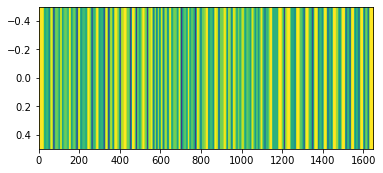

In [140]:
plt.imshow(mean_img.reshape(1,len(mean_img)),aspect=700)

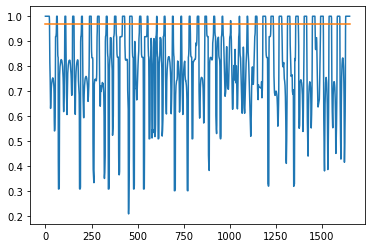

In [141]:
plt.plot(mean_img)
cut_off = 0.97
plt.plot([0,len(mean_img)],[cut_off]*2);

In [142]:
cut_off = 0.97
before = False
indexer = 0
for index, i in enumerate(mean_img):
    if i<cut_off:
        before = True
    elif i>cut_off and before:
        #plt.imshow(image[:,:index])
        
        indexer = index
    else:
        pass

In [143]:
dic = {}
for index, i in enumerate(mean_img):
    if i<cut_off:
        dic[index] = "letter"
    else:
        dic[index] = "space"

In [145]:
prev = "space"
img_arrs = {}
letter_index = 0
for i in dic:
    if dic[i] == prev:
        pass
    else:
        if dic[i] == "letter":  # start
            img_arrs[string0[letter_index]] = {"start":i}
            prev = "letter"
            
            
        else:
            img_arrs[string0[letter_index]]["stop"] = i
            prev = "space"
            letter_index+=1
            
            
    

In [148]:
for letter in img_arrs:
    j,k = img_arrs[letter]["start"],img_arrs[letter]["stop"]
    #plt.figure()
    arr = image[:,j:k]
    img_arrs[letter]["arr"] = arr

In [284]:
img_arrs[" "] = {"arr": np.ones(img_arrs["a"]["arr"].shape)}

In [395]:
letter_string = string.ascii_lowercase+"1234567890"+"         "
def make_sentence(string):
    letter_arr = [img_arrs[i]["arr"] for i in string]
    return np.concatenate(letter_arr,axis=1)

make_random_sentence = lambda length: "".join([letter_string[np.random.randint(0,len(letter_string))] for i in range(length)])

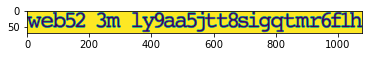

In [293]:
plt.imshow(make_sentence(make_random_sentence(30)))

['d pxr2j vl33dw5fo', ' 9lbm4ydersm k6jf', 'nffhdcnko kr8jvje', 'b1xy83dci41 2o 83', ' o b6pv bofhqp4s4', '9szk hcx 2 rs5 ge', ' 9l84r2dit00v r  ', 'rvs  aguulwk  ced', 'xv78n00 p fm 7 nj', ' v r s375tg8yu6 9', 'gniuw zuimf 4miqu', '3 gbve i d85mq 6z', '52ej9 gqs  bci gr', '3ex25bze g9k2apa ', 'wxudzs nz 4o1k6c ', '65 knp7 ucu02vh  ', ' 7u d7w5s4 6ia q9', 't5p6vce 73l au5jw', ' 2 xe7cka  6 qirj', 'utkxnp2pwob z  j ']


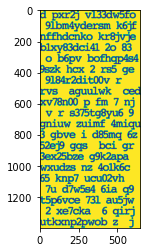

In [469]:
def make_receipt(width, height):
    sentences = [make_random_sentence(width) for i in range(height)]
    recipt_layers = []
    for i in sentences:
        recipt_layers.append(make_sentence(i))
        
        
    #recipt_layers = [make_sentence() for i in range(height)]
    #plt.imshow(recipt_layers[0])
    biggest_string_size = max([i.shape[1] for i in recipt_layers])
    #print(biggest_string_size)
    for k,i in enumerate(recipt_layers):
        if i.shape[1]<biggest_string_size:
            recipt_layers[k] = np.concatenate([recipt_layers[k],
                                               np.ones((img_arrs[" "]['arr'].shape[0],
                                                        biggest_string_size-i.shape[1]))
                                              ],axis=1)
            
        else:
            pass
        
    #return np.concatenate(recipt_layers,axis=0)
    return [np.array([i for i in np.concatenate(recipt_layers,axis=0)]),sentences]
    
    
#make_recipt(20,3)
recipt = make_recipt(17,20)
plt.imshow(recipt[0])
print(recipt[1])

In [470]:
for i in range(10):
    receipt, label = make_receipt(17,20)
    
    print(np.array(receipt).shape)

(1400, 633)
(1400, 648)
(1400, 639)
(1400, 656)
(1400, 641)
(1400, 641)
(1400, 654)
(1400, 656)
(1400, 645)
(1400, 637)


In [471]:
def make_data(width,height,num_receipts):
    
    receipts = [make_receipt(width,height) for _ in range(num_receipts)]
    #return receipts
    biggest_reciept = max([i[0].shape[1] for i in receipts])
    
    for k,i in enumerate(receipts):
        if i[0].shape[1] < biggest_reciept: 
            receipts[k][0] = np.concatenate([receipts[k][0],
                                               np.ones((receipts[k][0].shape[0],
                                                        biggest_reciept-i[0].shape[1]))
                                              ],axis=1)
    return receipts
    

In [479]:
imgs = make_data(17,20,20)

In [480]:
for receipt, label in imgs:

     print(np.array(receipt).shape)

(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)
(1400, 662)


In [485]:
receipt, label = make_data(17,20,20)[0]